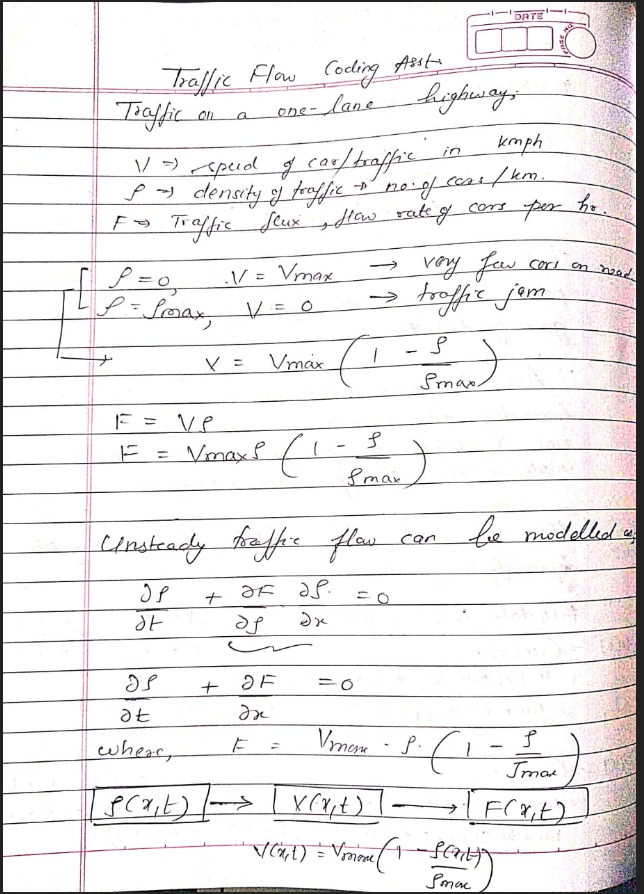

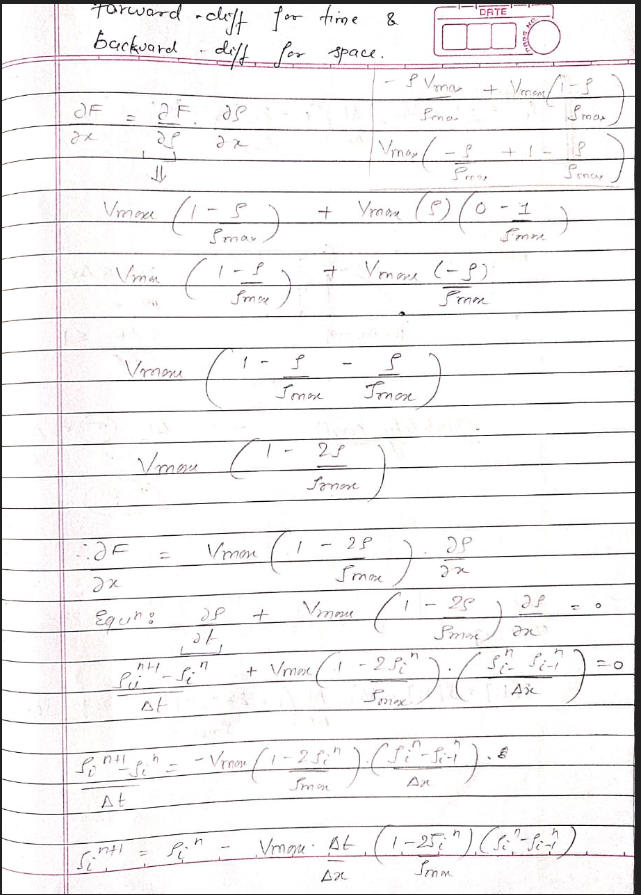

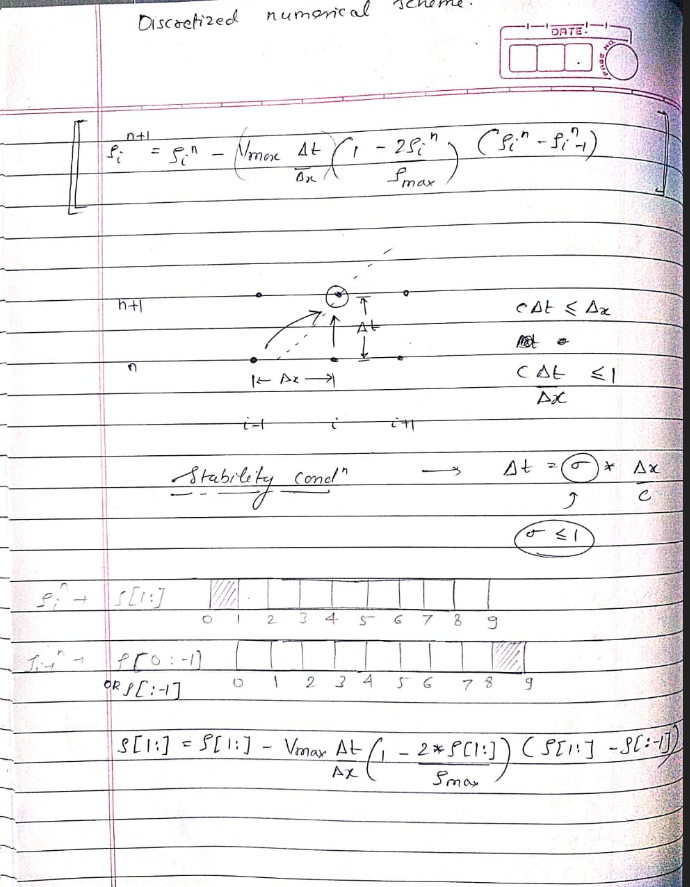

In [1]:
import numpy
from matplotlib import pyplot
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [2]:
#Set parameters

vmax = 136.0 #km/r
L = 11.0 #km
rho_max = 250.0 #cars/km
nx = 51
dx = L / (nx -1) #no. of spatial points
print(dx)
dt = 0.001 #hrs
nt =  200 #number of temporal moments

0.22


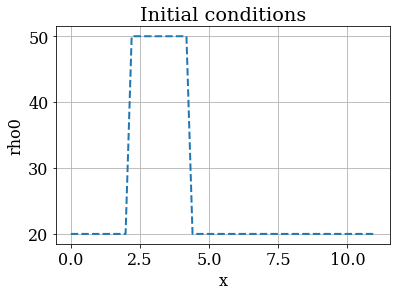

In [3]:
x = numpy.linspace(0, L, nx)
rho0 = numpy.ones(nx)*20
rho0[10:20] = 50

# Plot the initial conditions.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.title('Initial conditions')
pyplot.xlabel('x')
pyplot.ylabel('rho0')
pyplot.grid()
pyplot.plot(x, rho0, color='C0', linestyle='--', linewidth=2)
#pyplot.xlim(0.0, L)
#pyplot.ylim(0.0, 2.5);

In [4]:
# itegrate using numerical scheme
def rho(rho0, dx, dt, rho_max, vmax, nt = 10):
    rho = rho0.copy()
    rho_hist1 = [rho0.copy()]
    for n in range(nt):
        rho[1:] = rho[1:] - ((vmax*dt/dx)*(1 - ((2*rho[1:])/rho_max))*(rho[1:] - rho[:-1]))
        #rho[0] = rho[0] - ((vmax*dt/dx)*(1 - ((2/rho_max)*rho[0])*(rho[0] - rho[-1])))
        #here the boundary condition is that at any t, the rho at x = 0 is 10 (or 20 in case of second question case)
        rho_hist1.append(rho.copy())
        
        
    return rho_hist1
                                    

In [5]:
rho_hist1 = rho(rho0, dx, dt, rho_max, vmax, nt = 100)

#rho_t0 = rho(rho0, dx, dt, rho_max, vmax, nt = 5)[0]
#print(rho_t0.min())

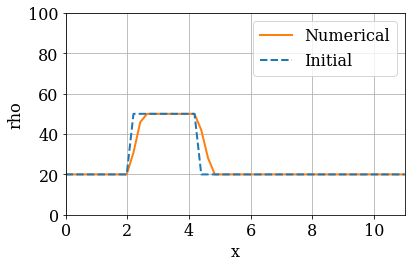

In [6]:
fig = pyplot.figure(figsize = (6.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('rho')
pyplot.grid()
line = pyplot.plot(x, rho_hist1[2], label = 'Numerical', color = 'C1', linestyle='-', linewidth=2)[0]
line2 = pyplot.plot(x, rho0, label = 'Initial', color = 'C0', linestyle='--', linewidth=2)[0]
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 100)
fig.tight_layout()

In [7]:
def update_plot(n, rho_hist):
    fig.suptitle('Time step {:0>2}'.format(n))
    line.set_ydata(rho_hist1[n])

In [8]:
# Create an animation.
anim = animation.FuncAnimation(fig, update_plot,
                               frames=100, fargs=(rho_hist1,),
                               interval=25)

In [9]:
# Display the video.
HTML(anim.to_html5_video())

In [10]:
answer_case1 = rho(rho0, dx, dt, rho_max, vmax, nt = 100)
#print(answer_case1[0])

rho_t0 = answer_case1[0]
rhomax_t0 = rho_t0.max()
print(rhomax_t0)

rho_t3 = answer_case1[50]
rhoavg_t3 = rho_t3.mean()
print(rhoavg_t3)
rhomax_t3 = rho_t3.max()
print(rhomax_t3)

rho_t6 = answer_case1[100]
rhomax_t6 = rho_t6.max()
print(rhomax_t6)

50.0
26.55400817281637
46.2134022928408
23.45841765767737


In [11]:
def velocity(vmax, rho_max, rho_q):
    
    V = (vmax*(1 - (rho_q/rho_max)))*1000/3600
    
    return V

In [12]:
velocity(vmax, rho_max, rho_q = 50)

30.222222222222225

In [13]:
velocity(vmax, rho_max, rho_q = rhoavg_t3)

33.76517209832998

In [14]:
velocity(vmax, rho_max, rho_q = rhomax_t3)

30.794419209081838